<a href="https://colab.research.google.com/github/ranam7amad/CODSOFT/blob/main/spam/notspam%20detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [261]:
from pickle import encode_long
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
import nltk
!pip install nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
nltk.download('punkt')
stopwords.words('english')
import string
string.punctuation
from sklearn.model_selection import train_test_split
from nltk.stem import SnowballStemmer
import string
from sklearn.feature_extraction.text import TfidfVectorizer



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [262]:
df = pd.read_csv('spam.csv', encoding = 'latin-1')
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [263]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
774,ham,Just sleeping..and surfing,NaN,NaN,NaN
21,ham,IÛ÷m going to try for 2 months ha ha only joking,NaN,NaN,NaN
519,ham,Usually the person is unconscious that's in ch...,NaN,NaN,NaN
2379,ham,"Good evening Sir, hope you are having a nice d...",NaN,NaN,NaN
5273,ham,Its too late:)but its k.wish you the same.,NaN,NaN,NaN


In [264]:
df.shape

(5572, 5)

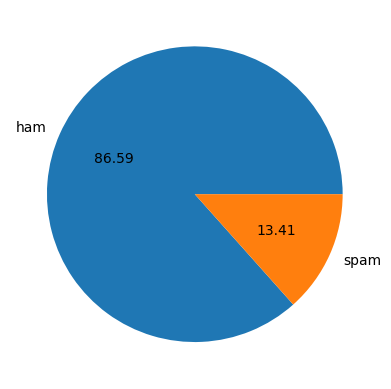

In [265]:
import matplotlib.pyplot as plt
plt.pie(df['v1'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [267]:
df.drop(columns = {'Unnamed: 2','Unnamed: 3' ,'Unnamed: 4' },inplace=True )
df.sample(5)

,v1,v2
2712,ham,Hey you still want to go for yogasana? Coz if ...
2671,ham,"That's cool, I'll come by like &lt;#&gt; ish"
861,ham,Your brother is a genius
1435,ham,Dad went out oredi...
2213,ham,"Goodmorning, today i am late for 2hrs. Because..."


In [268]:
df.rename(columns = {'v1':'Spam/Not_Spam','v2':'message'},inplace=True )
df.head()

,Spam/Not_Spam,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [269]:
encoder.fit_transform(df['Spam/Not_Spam'])

array([0, 0, 1, ..., 0, 0, 0])

In [270]:
df['Spam/Not_Spam'] = encoder.fit_transform(df['Spam/Not_Spam'])

In [271]:
df.head()

,Spam/Not_Spam,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [272]:
df = df.drop_duplicates()

In [273]:
df.duplicated().sum()

0

In [274]:
def message_preprocess(message):
    messsage = message.translate(str.maketrans('', '', string.punctuation))
    message = [word for word in message.split() if word.lower() not in stopwords.words('english')]
    return " ".join(message)

In [275]:
def transform_message(message):
  message = message.lower()
  message = nltk.word_tokenize(message)
  return message

In [276]:
df['message'].fillna("", inplace=True)

t_v = TfidfVectorizer(stop_words='english', max_features=100000)


label_encoder = LabelEncoder()


<ipython-input-276-ce67e5c4b8fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['message'].fillna("", inplace=True)


In [277]:
df.apply(message_preprocess('message'))

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5169, dtype: object

In [278]:
df['tranformed_text']= df['message'].apply(transform_message,message_preprocess)
df.head()

,Spam/Not_Spam,message,tranformed_text
0,0,"Go until jurong point, crazy.. Available only ...","[go, until, jurong, point, ,, crazy, .., avail..."
1,0,Ok lar... Joking wif u oni...,"[ok, lar, ..., joking, wif, u, oni, ...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,0,U dun say so early hor... U c already then say...,"[u, dun, say, so, early, hor, ..., u, c, alrea..."
4,0,"Nah I don't think he goes to usf, he lives aro...","[nah, i, do, n't, think, he, goes, to, usf, ,,..."


In [279]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer(max_features=5000)


In [288]:
x =cv.fit_transform(df['message'])


In [289]:
y =df['Spam/Not_Spam'].values

In [254]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 0)

In [255]:
from tkinter import Message
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
CountVectorizer = LogisticRegression(solver='liblinear', penalty='l1')
CountVectorizer.fit(X_train, y_train)
pred=CountVectorizer.predict(X_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
accuracy = accuracy_score(y_test,pred)
print("Accuracy: {:.2f}%". format (accuracy * 100))

0.9825918762088974
[[882   3]
 [ 15 134]]
Accuracy: 98.26%
